In [ ]:
pip install pycaret

In [ ]:
pip install surprise

In [ ]:
import pandas as pd
import numpy as np
import time

In [ ]:
start = time.time()

The objective is to make a ratings matrix for 10000 users, and all the 6185 items, using the predicted ratings from SlopeOne model of surpriseLib.

In [ ]:
software_data_for_ratings_matrix = pd.read_csv('/content/drive/MyDrive/Amazon Software/Amazon Software Ratings Matrix Data.csv', low_memory = False)

In [ ]:
software_meta_data = pd.read_csv('/content/drive/MyDrive/Amazon Software/Amazon Software Product Meta Data.csv')

In [ ]:
software_data_for_ratings_matrix

,Unnamed: 0,Unnamed: 0_x,overall,verified,reviewTime,reviewerID,Item ID,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Year,Unnamed: 0_y,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,Category of Software
0,0,0,5.0,True,"12 11, 2017",A157DJO32EN034,B00UB76290,{'Platform:': ' PC Download'},SAP,I don't really read on my PC. I just love Kin...,I just love Kindle.,1512950400,NaN,NaN,2017,19984,"['Software', 'Lifestyle & Hobbies', 'Home Publ...",NaN,['<div>Kindle for PC reading app gives users t...,NaN,Kindle for PC [Download],"['B01B28HHQ8', 'B07M6LJ8JL', 'B01ETYTGIE', 'B0...",NaN,Amazon Digital Services LLC,"['Buy once, read everywhere. Sign in with an A...",[],"['B004DLPXAO', 'B00KT54X3G', 'B00GMTC6HI', 'B0...",Software,NaN,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
1,1,44,5.0,True,"01 25, 2017",AW3UB7J1QBHWD,B00UB76290,{'Platform:': ' PC Download'},Eileen,I do miss my real books but this is a wonderfu...,... do miss my real books but this is a wonder...,1485302400,NaN,NaN,2017,19984,"['Software', 'Lifestyle & Hobbies', 'Home Publ...",NaN,['<div>Kindle for PC reading app gives users t...,NaN,Kindle for PC [Download],"['B01B28HHQ8', 'B07M6LJ8JL', 'B01ETYTGIE', 'B0...",NaN,Amazon Digital Services LLC,"['Buy once, read everywhere. Sign in with an A...",[],"['B004DLPXAO', 'B00KT54X3G', 'B00GMTC6HI', 'B0...",Software,NaN,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
2,2,72,1.0,True,"09 25, 2015",A345D38YIHMUEH,B00UB76290,{'Platform:': ' PC Download'},Charlotte Wooden-Hillis,Will not work on my laptop.,Will not work on my laptop.,1443139200,NaN,NaN,2015,19984,"['Software', 'Lifestyle & Hobbies', 'Home Publ...",NaN,['<div>Kindle for PC reading app gives users t...,NaN,Kindle for PC [Download],"['B01B28HHQ8', 'B07M6LJ8JL', 'B01ETYTGIE', 'B0...",NaN,Amazon Digital Services LLC,"['Buy once, read everywhere. Sign in with an A...",[],"['B004DLPXAO', 'B00KT54X3G', 'B00GMTC6HI', 'B0...",Software,NaN,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
3,3,76,4.0,True,"03 7, 2016",APWINJ9HAONIP,B00UB76290,{'Platform:': ' PC Download'},J. Rhyner,Works well when I don't have my Kindle White P...,Convient when on computer.,1457308800,NaN,NaN,2016,19984,"['Software', 'Lifestyle & Hobbies', 'Home Publ...",NaN,['<div>Kindle for PC reading app gives users t...,NaN,Kindle for PC [Download],"['B01B28HHQ8', 'B07M6LJ8JL', 'B01ETYTGIE', 'B0...",NaN,Amazon Digital Services LLC,"['Buy once, read everywhere. Sign in with an A...",[],"['B004DLPXAO', 'B00KT54X3G', 'B00GMTC6HI', 'B0...",Software,NaN,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
4,4,94,5.0,True,"01 2, 2017",AEI7AM3M3G4A8,B00UB76290,{'Platform:': ' PC Download'},Rev Dave,I use it on my laptop and on a semi-regular basis,My PC Kindle app,1483315200,NaN,NaN,2017,19984,"['Software', 'Lifestyle & Hobbies', 'Home Publ...",NaN,['<div>Kindle for PC reading app gives users t...,NaN,Kindle for PC [Download],"['B01B28HHQ8', 'B07M6LJ8JL', 'B01ETYTGIE', 'B0...",NaN,Amazon Digital Services LLC,"['Buy once, read everywhere. Sign in with an A...",[],"['B004DLPXAO', 'B00KT54X3G', 'B00GMTC6HI', 'B0...",Software,NaN,</div>,$0.00,[],[],"{'Downloading:': 'Currently, this item is avai...",Lifestyle & Hobbies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58188,58188,63798,5.0,True,"03 4, 2015",A2LY4H9K5DLFJ8,B0040GACGM,NaN,RM,Great value!,Five Stars,1425427200,NaN,NaN,2015,14428,"['Software', 'Antivirus & Security', 'Internet...",NaN,['Norton Internet Security protects your busin...,NaN,Norton Internet Security 2011 - 10 User [Old V...,[],NaN,Symantec,"[""Stay protected without sacrificing performan...","15,721 in Software (",[],Softw

Code used for creating the ratings matrix:

In [ ]:
# # Note that the SlopeOne algo object 'algo_slope_one' mentioned here is trained later on in this notebook, the matrix was created and saved on Drive,
# # to avoid doing it repeatedly.
# # I have just put the code here I used for creating the matrix

# list_of_users_for_ratings_matrix = np.unique(software_data_for_ratings_matrix['reviewerID'])
# no_of_items = len (np.unique(software_data_for_ratings_matrix['Item ID']))

# global list_of_all_items
# list_of_all_items = np.unique(software_data_for_ratings_matrix['Item ID'])

# temp_df = []
# # empty list for storing output data frames of top n products of a given user
# # The function below predicts the ratings for ALL items in 'list_of_all_items', given a user, using SlopeOne algo from surpriseLib


# def all_items_predictor(user):
#   user_col = np.tile(user,no_of_items)
#   item_col = list_of_all_items
#   rating_col = no_of_items*[0]

#   testing_df = pd.DataFrame({"User ID": user_col, "Item ID": item_col, "Rating": rating_col})

#   reader = Reader(rating_scale=(1, 5))
#   test_set_data = Dataset.load_from_df(testing_df, reader)
#   trainset_pseudo, test_set_to_be_used = train_test_split(test_set_data, test_size=1.0,random_state=42)

#   predicted_ratings = algo_slope_one.test(test_set_to_be_used)

#   n = len(predicted_ratings)

#   User_ID=n*[0]
#   Item_ID=n*[0]
#   Predicted_Rating=n*[0]
#   for i in range(n):
#     User_ID[i] = predicted_ratings[i].uid
#     Item_ID[i] = predicted_ratings[i].iid
#     Predicted_Rating[i] = predicted_ratings[i].est 


#   Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,
#                            "Predicted Rating":Predicted_Rating})

#   return Result

# # This is done just to get the same order of the items for every user while creating the matrix, as they appear in 'Result'
# x = all_items_predictor('A3MZS96JJ53RBX')
# item_col_for_matrix = list(x['Item ID'])

# # calling all_items_predictor(user) for all users that we have
# df = pd.DataFrame([],columns=item_col_for_matrix)

# for user in list_of_users_for_ratings_matrix[:10000]:
#   predicted_ratings_of_current_user_for_all_items = all_items_predictor(user)
#   list_of_predicted_ratings_of_current_user_for_all_items = [list(predicted_ratings_of_current_user_for_all_items['Predicted Rating'])]
#   df = df.append(pd.DataFrame(list_of_predicted_ratings_of_current_user_for_all_items,
#                               columns = item_col_for_matrix,
#                               index = [user]))
  
# # df is our ratings matrix

# df.to_csv('/content/drive/MyDrive/Amazon Software/ratings_matrix_10000_rows.csv')

In [ ]:
# software_data_for_ratings_matrix.to_csv('/content/drive/MyDrive/Amazon Software/Amazon Software Ratings Matrix Data.csv')

In [ ]:
ratings_matrix = pd.read_csv('/content/drive/MyDrive/Amazon Software/ratings_matrix_10000_rows.csv')

In [ ]:
ratings_matrix.rename(columns = {'Unnamed: 0':'User ID'}, inplace = True)

In [ ]:
ratings_matrix = ratings_matrix.set_index('User ID')
ratings_matrix

,B00X84I6RO,B00EPACNPQ,B00PM90SYC,B013JH52C6,B00LLQMC3K,B0092T320U,B00EJZOLBG,B00HNZLKVS,B00NGIYH6Q,B00ISW63N0,B0001J3R9Q,B00A9Y478I,B00MG66CWQ,B001B8DPU2,B000063LGG,B00B1JWVG0,3959828144,B00AITJI2Y,B00GVFI028,B00HE4K4O2,B00GKGP5NK,B00005MF7U,B000OYGENE,B009IRPAKQ,B00TJCZXPM,B007X713KO,B00029BOT0,B003YVI914,B00024YCIA,B0041OWAWC,B00KWLGRCM,B01586FNLQ,B000DINB4G,B00005BL28,B000K5WCXS,B001RYFYYK,B00IDEXHJQ,B000I66UBO,B00CG0CL1S,B003ZRYSXA,...,B001C2ZL54,B00K7FVOUI,B005ZVZLYE,B00576JU9E,B00002S91V,B0016P9KWC,B0009IG0OS,B0058YS7KS,B001M544GI,B004FG41I2,B000B6AGF2,B00006415C,B005LC5KW0,B00MEXQ7U8,B00EZJRS8E,B009APQBIG,B00J6J3MWY,B000DN7JMQ,B00O66G6XE,B00T9STHHQ,B003YJ78AE,B011I737YO,B003NS5KNI,B00029LME2,B000XS9YJW,B000021Z1O,B005NBKVVE,B007IWCQ8W,B009HBCPS8,B01019TDJ8,B00HPLOSV4,B00TT4O0XQ,B0000639VM,B014SOKD9Q,B006P24KTY,B00C7UN9D6,B00PT6H9UY,B00QMWYANI,B00UZI1UP6,B00061M0QK
User ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A0135824JBPU8ADCLM59,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A0233989FYOLLK5PN030,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A026702690I9EFBGWS8B,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.077222,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
A0284208PB0CNSHI1OC6,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.077222,4.000000,4.000000,4.000000,4.000000,3.077222,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.077222,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.077222,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.077222,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
A0347419QTYOGWVC1VVS,5.000000,5.000000,5.00000

We will aim to cluster the users using k-means clustering from PyCaret

In [ ]:
from pycaret.clustering import *

In [ ]:
exp_ratings = setup(ratings_matrix,normalize=True,normalize_method='maxabs',session_id = 8962)

,Description,Value
0,session_id,8962
1,Original Data,"(10000, 6185)"
2,Missing Values,False
3,Numeric Features,6185
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(10000, 6185)"
9,CPU Jobs,-1


In [ ]:
kmeans = create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8808,149860.2665,0.1795,0,0,0


In [ ]:
# plot a model
plot_model(kmeans) 

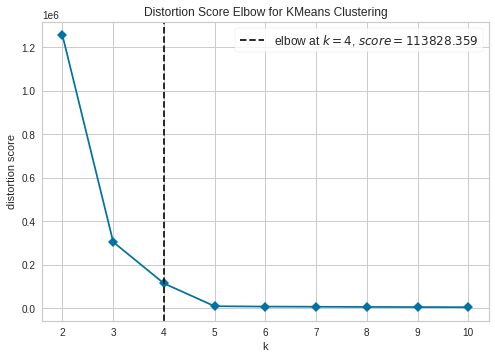

In [ ]:
plot_model(kmeans, plot = 'elbow')

In [ ]:
# assign labels using trained model
# every user gets assigned to a cluster
kmeans_df = assign_model(kmeans)
kmeans_df.head(10)

,B00X84I6RO,B00EPACNPQ,B00PM90SYC,B013JH52C6,B00LLQMC3K,B0092T320U,B00EJZOLBG,B00HNZLKVS,B00NGIYH6Q,B00ISW63N0,B0001J3R9Q,B00A9Y478I,B00MG66CWQ,B001B8DPU2,B000063LGG,B00B1JWVG0,3959828144,B00AITJI2Y,B00GVFI028,B00HE4K4O2,B00GKGP5NK,B00005MF7U,B000OYGENE,B009IRPAKQ,B00TJCZXPM,B007X713KO,B00029BOT0,B003YVI914,B00024YCIA,B0041OWAWC,B00KWLGRCM,B01586FNLQ,B000DINB4G,B00005BL28,B000K5WCXS,B001RYFYYK,B00IDEXHJQ,B000I66UBO,B00CG0CL1S,B003ZRYSXA,...,B00K7FVOUI,B005ZVZLYE,B00576JU9E,B00002S91V,B0016P9KWC,B0009IG0OS,B0058YS7KS,B001M544GI,B004FG41I2,B000B6AGF2,B00006415C,B005LC5KW0,B00MEXQ7U8,B00EZJRS8E,B009APQBIG,B00J6J3MWY,B000DN7JMQ,B00O66G6XE,B00T9STHHQ,B003YJ78AE,B011I737YO,B003NS5KNI,B00029LME2,B000XS9YJW,B000021Z1O,B005NBKVVE,B007IWCQ8W,B009HBCPS8,B01019TDJ8,B00HPLOSV4,B00TT4O0XQ,B0000639VM,B014SOKD9Q,B006P24KTY,B00C7UN9D6,B00PT6H9UY,B00QMWYANI,B00UZI1UP6,B00061M0QK,Cluster
User ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A0135824JBPU8ADCLM59,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 2
A0233989FYOLLK5PN030,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 2
A026702690I9EFBGWS8B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 2
A0284208PB0CNSHI1OC6,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.077222,4.0,4.0,4.0,4.0,3.077222,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.077222,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.077222,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.077222,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,Cluster 3
A0347419QTYOGWVC1VVS,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Cluster 1
A0514130OKAGGUE7G6PR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 2
A0580502I7Y83PHM8R9V,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.077222,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,Cluster 1
A0663386R35DPMUM8FSH,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.077222,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Cluster 2
A0735469C3RVU9AWMDCE,

Now, every user has been assigned to a cluster. So, given a user id, we can check which cluster it belongs to, make a list of ALL the items previously rated by every user (including the input user) in the cluster, and predict the rating for each of these items, sort this result in descending order of predicted ratings, and display the top n items. 

Below is a function that returns the past data of a given user_id, in sorted order (descending) of ratings.

In [ ]:
def display_past_user_data(user_id):
  grouped_software_data_for_ratings_matrix = software_data_for_ratings_matrix.groupby('reviewerID')
  past_user_data = grouped_software_data_for_ratings_matrix.get_group(user_id)
  # past_user_data = past_user_data.drop(columns=['verified','style','reviewText','summary','also_buy','also_view','rank'])
  past_user_data = pd.DataFrame({"User ID":past_user_data['reviewerID'], "Item ID": past_user_data['Item ID'],
                                 "Title": past_user_data['title'],"Brand": past_user_data['brand'],"Rating":past_user_data['overall']})
  past_user_data_sorted = past_user_data.sort_values(by='Rating')
  past_user_data_sorted = past_user_data_sorted.drop_duplicates() 
  return past_user_data_sorted

In [ ]:
display_past_user_data('A0233989FYOLLK5PN030')

,User ID,Item ID,Title,Brand,Rating
51190,A0233989FYOLLK5PN030,B00006HNHB,Avery Wizard for Microsoft Word,Avery,1.0


Grouping the kmeans_df by cluster

In [ ]:
grouped_kmeans_df = kmeans_df.groupby(by='Cluster')

Function to return the cluster number of a given user_id:

In [ ]:
def get_cluster_of_user(user_id):

  row_of_user = kmeans_df.loc[user_id,:]
  cluster_of_user = row_of_user['Cluster']
  cluster_number_of_user = int(cluster_of_user[-1])

  return cluster_number_of_user

In [ ]:
get_cluster_of_user('A0735469C3RVU9AWMDCE')

2

Function to return a list of users in a given cluster:

In [ ]:
def get_all_users_in_a_cluster(cluster_number):
  cluster_data = grouped_kmeans_df.get_group('Cluster'+' '+str(cluster_number))
  # cluster data stores all data of the given 'cluster number'

  list_of_users_in_the_cluster = cluster_data.index.tolist()
  # since the 'User ID' is the index

  return list_of_users_in_the_cluster

In [ ]:
print(get_all_users_in_a_cluster(2))

['A0135824JBPU8ADCLM59', 'A0233989FYOLLK5PN030', 'A026702690I9EFBGWS8B', 'A0514130OKAGGUE7G6PR', 'A0663386R35DPMUM8FSH', 'A0735469C3RVU9AWMDCE', 'A10056VD1UVVB2', 'A100KZZHBZNTJM', 'A100RN0SOBESBB', 'A101UD8HCZ3XXT', 'A1021K5I0D9MAW', 'A1025F8YMH1DO6', 'A1028ONTJNKBFV', 'A102XVT37JLQNK', 'A10341A3CQPVK8', 'A103IFWWK8ZVD8', 'A103QDXBLMHL1U', 'A104F2NDEEVFLI', 'A104UPPKIT52HM', 'A10592Y5AWH41M', 'A1059KOMVX776S', 'A105X0Z62J2CFA', 'A1078VTLR0LMXM', 'A107953F7C9O05', 'A107YJ9CNP8APT', 'A10860VQHSWUQ7', 'A108AH3H7LS2A1', 'A108FU1S4VK4S1', 'A108HVFMKG4KGJ', 'A109GEJ0I83F72', 'A109KBSDZ32F28', 'A10B0A2OZLULBF', 'A10BS14KMOI744', 'A10C1RZ1FBIG64', 'A10C4R2C6IFP5L', 'A10CFH7RIKDII2', 'A10CH3TMF7HC5C', 'A10CIFK4IWEWGJ', 'A10CPX1FIBOZRU', 'A10CRW7XRJBJ2G', 'A10D8D7X3V08PI', 'A10DF16F4Q624R', 'A10E2X82LF9XJY', 'A10EVI8FF9XQQ2', 'A10EWPKYVCQN2', 'A10FD04OHNQD2T', 'A10FE4JODCBHW7', 'A10G4PY3ISB4LI', 'A10G5JS9QIMBQ9', 'A10G7Y7R4KNDB4', 'A10GMX6VKK4N1W', 'A10GW9UYETD5KJ', 'A10H9OMCU0YX0J', 'A10IHZ4RR

After getting all users of a cluster, we can start constructing a data frame comprising of all these users + the items that they previously reviewed.

The function below was used to store the data of each cluster as a .csv file. Getting the data of each cluster takes 1.5 hours at least, and a max running time of 2.5 hours. The total running time for storing the data of the 4 clusters would be 7-8 hours.

In [ ]:
def get_data_frame_of_all_users_and_their_items_in_a_cluster(cluster_number):

  # list of all users in the given cluster
  list_of_users_in_the_cluster = get_all_users_in_a_cluster(cluster_number)
  
  # empty list for storing all dfs
  past_dfs_of_users = []
  for user in list_of_users_in_the_cluster:
    past_data_of_current_user = display_past_user_data(user) # this is a df
    past_dfs_of_users.append(past_data_of_current_user)


  result_df = pd.concat(past_dfs_of_users)
  result_df.reset_index( drop = True, inplace = True)
  return result_df



In [ ]:
# data_frame_of_all_users_and_their_items_in_a_cluster = get_data_frame_of_all_users_and_their_items_in_a_cluster(1)
# data_frame_of_all_users_and_their_items_in_a_cluster

In [ ]:
# data_frame_of_all_users_and_their_items_in_a_cluster.to_csv('/content/drive/MyDrive/Amazon Software/Cluster_data_number_1.csv')

In [ ]:
# storing the 4 dataframes of each cluster in a list, for accessing.

cluster_data_frames = []

for cluster in range(4):
  if cluster == 0:
    current_df = pd.read_csv('/content/drive/MyDrive/Amazon Software/Cluster_data_number_0.csv')
  elif cluster == 1:
    current_df = pd.read_csv('/content/drive/MyDrive/Amazon Software/Cluster_data_number_1.csv')
  elif cluster == 2:
    current_df = pd.read_csv('/content/drive/MyDrive/Amazon Software/Cluster_data_number_2.csv')
  elif cluster == 3:
    current_df = pd.read_csv('/content/drive/MyDrive/Amazon Software/Cluster_data_number_3.csv')
  cluster_data_frames.append(current_df)

# thus cluster_data_frames[i], stores the data frame containing all info of the cluster i

In [ ]:
# example of the data format, here is the data of cluster 1

cluster_data_frames[1]

,Unnamed: 0,User ID,Item ID,Title,Brand,Rating
0,0,A0347419QTYOGWVC1VVS,B00E6LI5NI,McAfee AntiVirus Plus 3PC 2014 (Free Upgrade t...,McAfee,5.0
1,1,A0580502I7Y83PHM8R9V,B01617VPUY,TurboTax Deluxe 2015 Federal + State Taxes + F...,Intuit,5.0
2,2,A088124525MDL6Y0KKG,B00009L1HM,Microsoft Money 2004 Deluxe (Old Version),Microsoft,5.0
3,3,A095279462RKEPKUCAWI,B00E6LIECA,QuickBooks Pro with Enhanced Payroll 2014 [Old...,Intuit,5.0
4,4,A1002Z8XMR58D7,B00F8K9L66,TurboTax Home and Business Fed + Efile + State...,Intuit,5.0
...,...,...,...,...,...,...
3886,3886,A1P6ZHDBUS85U0,B00EZPXYP4,NORTON 360 21.0 EN 1U 3LIC MM,Symantec,5.0
3887,3887,A1P72QICT7YY8Z,B01617VPUY,TurboTax Deluxe 2015 Federal + State Taxes + F...,Intuit,5.0
3888,3888,A1P76SJBIQSYB9,B00GDDLNF4,Maptitude 2018 DVD Mapping Software Mpctrypkg,Maptitude,5.0
3889,3889,A1P7A9SOYKY42C,B01617VTFK,H&amp;R Block 2015 Basic Tax Software + Refun...,H&R Block,5.0


Training SlopeOne model from surpriseLib:

In [ ]:
surprise_data_balanced = pd.read_csv('/content/drive/MyDrive/Amazon Software/Amazon Software Balanced Training Data.csv')

In [ ]:
surprise_data_balanced = surprise_data_balanced.drop(columns = ['Unnamed: 0'])
surprise_data_balanced

,User ID,Item ID,Ratings
0,A2DWA90IFXAYFU,B00MCLG14O,2.0
1,A2JVIA9P648H6Y,B006T4SQG6,2.0
2,A1DGVP1E66GMPJ,B00CTTEKJW,5.0
3,ANWG4TWZMVTKV,B001GL6QHS,5.0
4,AVKHD33ROHV6G,B00NKY4ZCC,5.0
...,...,...,...
135003,A1RKC8MIOS183Z,B00BZY0QYA,2.0
135004,A1APDO51GMW3O5,B00005LJEN,1.0
135005,A26A1UNLCLX3WD,B00005IB4S,2.0
135006,AJRFDI7L8F10,B0002DOECA,1.0


In [ ]:
# note: for whatever reason, this cell displays an error if you 'Run all' on the entire notebook, but 
# if you run the cell individually, it runs.

from surprise import Reader
reader = Reader(rating_scale=(1, 5))
from surprise import Dataset
from surprise import SlopeOne
from surprise.model_selection import train_test_split


# The columns must correspond to user id, item id and ratings (in that order)
data = Dataset.load_from_df(surprise_data_balanced, reader)



trainset, testset = train_test_split(data, test_size=.25,random_state=42)

algo_slope_one = SlopeOne()
algo_slope_one.fit(trainset)

In [ ]:
import numpy as np

## Top N Recommender:

In [ ]:
def top_n_recommender(user_id, n_parameter):
  # first we have to check which cluster this user belongs to 

  cluster_of_input_user = get_cluster_of_user(user_id)

  # getting the data relevant to the user's cluster
  data_frame_of_all_users_and_their_items_in_a_cluster = cluster_data_frames[cluster_of_input_user]

  # creating a test df
  test_df = pd.DataFrame({"User ID": list(np.tile(user_id,len(data_frame_of_all_users_and_their_items_in_a_cluster))),
                        "Item ID":data_frame_of_all_users_and_their_items_in_a_cluster['Item ID'],
                        "Rating":data_frame_of_all_users_and_their_items_in_a_cluster['Rating']})
  testdata = Dataset.load_from_df(test_df, reader)
  fake_trainset,testset = train_test_split(testdata, test_size=1.0,random_state=42)

  # predicting ratings for all items rated by all users in the cluster
  predictions = algo_slope_one.test(testset)

  n = len(predictions)

  User_ID=n*[0]
  Item_ID=n*[0]
  True_Rating=n*[0]
  Predicted_Rating=n*[0]
  Absolute_Error=n*[0]

  for i in range(n):
    User_ID[i] = predictions[i].uid
    Item_ID[i] = predictions[i].iid
    True_Rating[i] = predictions[i].r_ui
    Predicted_Rating[i] = predictions[i].est 
    Absolute_Error[i] = abs(predictions[i].est-predictions[i].r_ui)

  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,"True Rating":True_Rating,"Predicted Rating":Predicted_Rating,"Absolute Error":Absolute_Error})
  Result = Result.sort_values(by='Predicted Rating',ascending=False)
  output = pd.DataFrame({"User ID":Result['User ID'],
                        "Item ID":Result['Item ID'],
                        "Predicted Rating":Result["Predicted Rating"]})
  output= pd.merge(output,software_meta_data,on='Item ID')
  output = pd.DataFrame({"Item ID":output['Item ID'],
                        "Title":output['title'],
                        "Brand":output['brand'],
                        "Predicted Rating":output['Predicted Rating']})
  output = output.drop_duplicates()

  output.reset_index(drop=True,inplace=True)
  return output.head(n_parameter)


In [ ]:
top_n_recommender('A1010WTD4DKJ8J',5)

,Item ID,Title,Brand,Predicted Rating
0,B00UB76290,Kindle for PC [Download],Amazon Digital Services LLC,5.0
1,B00EZQYC8G,Norton Internet Security 2014 - 1 Year / 3 Lic...,Symantec,5.0
2,B00EZPXYP4,NORTON 360 21.0 EN 1U 3LIC MM,Symantec,5.0
3,B0068M5ZCM,Cook'n Recipe Organizer Version 10,DVO Enterprises,5.0
4,B002IKIHEG,Land of the Lost,Will Ferrell,5.0


## Evaluation of the Top N Recommender:

We will try to see that for each user who has rated 3 or more items, how many of the recommendations in Top 5, Top 10 and Top 15 were items that the user had previously rated. We will then calculated the mean of this value across all the users.

In [ ]:
def evaluator(user_id,n):
  top_n_df = top_n_recommender(user_id,n)
  past_user_data = display_past_user_data(user_id)
  count = 0
  for index, row in top_n_df.iterrows():
    for index_, row_ in past_user_data.iterrows():
      if row['Item ID'] == row_['Item ID']:
        count+=1
        break

  Number_of_items_out_of_n_that_are_previously_rated = count

  return Number_of_items_out_of_n_that_are_previously_rated

In [ ]:
# Number of previously rated items found by the recommender
evaluator('A1010WTD4DKJ8J',5)

0

In [ ]:
# first we must get a list of the 10000 users and get the data of those 10000 users from the 'software_data_for_ratings_matrix'
user_list_ten_k = list(ratings_matrix.index)
len(user_list_ten_k)

10000

In [ ]:
data_of_the_ten_k_users = []

loop_counter = 1
for u in user_list_ten_k:
  if loop_counter%1000==0:
    print("Current iteration is:",loop_counter)
  current_user_row = software_data_for_ratings_matrix[software_data_for_ratings_matrix['reviewerID'] == u]
  data_of_the_ten_k_users.append(current_user_row)
  loop_counter+=1

data_frame_of_the_ten_k_users = pd.concat(data_of_the_ten_k_users)


Current iteration is: 1000
Current iteration is: 2000
Current iteration is: 3000
Current iteration is: 4000
Current iteration is: 5000
Current iteration is: 6000
Current iteration is: 7000
Current iteration is: 8000
Current iteration is: 9000
Current iteration is: 10000


In [ ]:
count_of_items_previously_rated = dict(data_frame_of_the_ten_k_users['reviewerID'].value_counts())
print(count_of_items_previously_rated)

{'A1BT5SR5MTZK4V': 7, 'A14V7Y1TE21VT3': 6, 'A125ZNOVIZTWNN': 6, 'A1J9LW078SZFQQ': 5, 'A1LMH3D9Z7IW1H': 4, 'A17SZSS60ZCMN4': 4, 'A17USEQCX31NS2': 4, 'A10S3TPJ3WUPHF': 4, 'A12DQZKRKTNF5E': 4, 'A1EVSIEJR3A8KA': 4, 'A1G8RES4IB05KH': 4, 'A1G9JCB54XMLAW': 4, 'A17F4K4S2TVSQH': 4, 'A1DCNQFWINIC7U': 4, 'A16FJLUV80RFR2': 4, 'A13CV9DJJJYEO7': 4, 'A10DGX6FDNXCGQ': 3, 'A10P8UG177H2XR': 3, 'A1C47ROOK7BSVL': 3, 'A1IIX7TMCXWHQ1': 3, 'A13MSG9QXC4G4F': 3, 'A1B7U3K0URIYGB': 3, 'A1JZFGZEZVWQPY': 3, 'A1FEP2ULP7GZ82': 3, 'A1JOANG98KBFKU': 3, 'A10XWS9V6BINME': 3, 'A1DEFSDYJ491Z8': 3, 'A1EWREXKGNEFZL': 3, 'A13X19AIA4ZOY3': 3, 'A14C3PIFAVGL1K': 3, 'A1F6VFONU9V9QI': 3, 'A1CVBGJTRBGW8V': 3, 'A19TBBLWIXAH4C': 3, 'A18RKDLYP99DK6': 3, 'A19UTUEBWKIZFT': 3, 'A1E2ODNEYJ1UWX': 3, 'A1HC6LHXSO1O2S': 3, 'A115XPA9VO3AOV': 3, 'A167KI3P7XN1AM': 3, 'A1DT51YTASUBS': 3, 'A12GG3M1A1OMD2': 3, 'A142MN31GWQJC2': 3, 'A1MRPX3RM48T2I': 3, 'A1LQ1MQNS5GKRQ': 3, 'A1EMN4T3ROJDOO': 3, 'A13JBWCE5ZKCPM': 3, 'A1J44U25X547CG': 3, 'A1CPL11TZE1O

In [ ]:
# Filtering the dictionary to retain only those users who rate more than 3 items.

filtered_dict = dict(filter(lambda x: x[1] >= 3,count_of_items_previously_rated.items()))
print(filtered_dict)

{'A1BT5SR5MTZK4V': 7, 'A14V7Y1TE21VT3': 6, 'A125ZNOVIZTWNN': 6, 'A1J9LW078SZFQQ': 5, 'A1LMH3D9Z7IW1H': 4, 'A17SZSS60ZCMN4': 4, 'A17USEQCX31NS2': 4, 'A10S3TPJ3WUPHF': 4, 'A12DQZKRKTNF5E': 4, 'A1EVSIEJR3A8KA': 4, 'A1G8RES4IB05KH': 4, 'A1G9JCB54XMLAW': 4, 'A17F4K4S2TVSQH': 4, 'A1DCNQFWINIC7U': 4, 'A16FJLUV80RFR2': 4, 'A13CV9DJJJYEO7': 4, 'A10DGX6FDNXCGQ': 3, 'A10P8UG177H2XR': 3, 'A1C47ROOK7BSVL': 3, 'A1IIX7TMCXWHQ1': 3, 'A13MSG9QXC4G4F': 3, 'A1B7U3K0URIYGB': 3, 'A1JZFGZEZVWQPY': 3, 'A1FEP2ULP7GZ82': 3, 'A1JOANG98KBFKU': 3, 'A10XWS9V6BINME': 3, 'A1DEFSDYJ491Z8': 3, 'A1EWREXKGNEFZL': 3, 'A13X19AIA4ZOY3': 3, 'A14C3PIFAVGL1K': 3, 'A1F6VFONU9V9QI': 3, 'A1CVBGJTRBGW8V': 3, 'A19TBBLWIXAH4C': 3, 'A18RKDLYP99DK6': 3, 'A19UTUEBWKIZFT': 3, 'A1E2ODNEYJ1UWX': 3, 'A1HC6LHXSO1O2S': 3, 'A115XPA9VO3AOV': 3, 'A167KI3P7XN1AM': 3, 'A1DT51YTASUBS': 3, 'A12GG3M1A1OMD2': 3, 'A142MN31GWQJC2': 3, 'A1MRPX3RM48T2I': 3, 'A1LQ1MQNS5GKRQ': 3, 'A1EMN4T3ROJDOO': 3, 'A13JBWCE5ZKCPM': 3, 'A1J44U25X547CG': 3, 'A1CPL11TZE1O

In [ ]:
user_column = filtered_dict.keys()
user_column

dict_keys(['A1BT5SR5MTZK4V', 'A14V7Y1TE21VT3', 'A125ZNOVIZTWNN', 'A1J9LW078SZFQQ', 'A1LMH3D9Z7IW1H', 'A17SZSS60ZCMN4', 'A17USEQCX31NS2', 'A10S3TPJ3WUPHF', 'A12DQZKRKTNF5E', 'A1EVSIEJR3A8KA', 'A1G8RES4IB05KH', 'A1G9JCB54XMLAW', 'A17F4K4S2TVSQH', 'A1DCNQFWINIC7U', 'A16FJLUV80RFR2', 'A13CV9DJJJYEO7', 'A10DGX6FDNXCGQ', 'A10P8UG177H2XR', 'A1C47ROOK7BSVL', 'A1IIX7TMCXWHQ1', 'A13MSG9QXC4G4F', 'A1B7U3K0URIYGB', 'A1JZFGZEZVWQPY', 'A1FEP2ULP7GZ82', 'A1JOANG98KBFKU', 'A10XWS9V6BINME', 'A1DEFSDYJ491Z8', 'A1EWREXKGNEFZL', 'A13X19AIA4ZOY3', 'A14C3PIFAVGL1K', 'A1F6VFONU9V9QI', 'A1CVBGJTRBGW8V', 'A19TBBLWIXAH4C', 'A18RKDLYP99DK6', 'A19UTUEBWKIZFT', 'A1E2ODNEYJ1UWX', 'A1HC6LHXSO1O2S', 'A115XPA9VO3AOV', 'A167KI3P7XN1AM', 'A1DT51YTASUBS', 'A12GG3M1A1OMD2', 'A142MN31GWQJC2', 'A1MRPX3RM48T2I', 'A1LQ1MQNS5GKRQ', 'A1EMN4T3ROJDOO', 'A13JBWCE5ZKCPM', 'A1J44U25X547CG', 'A1CPL11TZE1OXB', 'A1IX3XRIQETMMB', 'A1JMGQ09UTGM0K', 'A1BKJNAWJT2TG2', 'A190KAW1FR7D9L', 'A16Z044V830EQ6', 'A1I2MOCLWN6EWM', 'A1API9Q3XB600R', 

In [ ]:
len(user_column)

59

In [ ]:
no_of_items_previously_rated = filtered_dict.values()
no_of_items_previously_rated

dict_values([7, 6, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
top_5_metrics = []
top_10_metrics = []
top_15_metrics = []
user_df_col = []
loop_counter = 1
for user in user_column:
  if loop_counter%5==0:
    print("Current iteration is:",loop_counter)
  top_5_val = evaluator(user,5)
  top_10_val = evaluator(user,10)
  top_15_val = evaluator(user,15)

  top_5_metrics.append(top_5_val)
  top_10_metrics.append(top_10_val)
  top_15_metrics.append(top_15_val)

  user_df_col.append(user)
  loop_counter+=1

Current iteration is: 5
Current iteration is: 10
Current iteration is: 15
Current iteration is: 20
Current iteration is: 25
Current iteration is: 30
Current iteration is: 35
Current iteration is: 40
Current iteration is: 45
Current iteration is: 50
Current iteration is: 55


In [ ]:
evaluate_df = pd.DataFrame({"USER ID": user_column, "Number of previously rated items in Top 5": top_5_metrics, 
                            "Number of previously rated items in Top 10": top_10_metrics, 
                            "Number of previously rated items in Top 15": top_15_metrics, 
                            "No. of items previously rated": no_of_items_previously_rated})

In [ ]:
evaluate_df

,USER ID,Number of previously rated items in Top 5,Number of previously rated items in Top 10,Number of previously rated items in Top 15,No. of items previously rated
0,A1BT5SR5MTZK4V,0,0,0,7
1,A14V7Y1TE21VT3,3,3,3,6
2,A125ZNOVIZTWNN,0,0,0,6
3,A1J9LW078SZFQQ,2,3,3,5
4,A1LMH3D9Z7IW1H,0,0,0,4
5,A17SZSS60ZCMN4,0,0,0,4
6,A17USEQCX31NS2,2,2,2,4
7,A10S3TPJ3WUPHF,1,1,1,4
8,A12DQZKRKTNF5E,1,1,1,4
9,A1EVSIEJR3A8KA,1,1,1,4


In [ ]:
mean_number_of_prev_rated_items_in_top_5 = evaluate_df['Number of previously rated items in Top 5'].mean()
mean_number_of_prev_rated_items_in_top_10 = evaluate_df['Number of previously rated items in Top 10'].mean()
mean_number_of_prev_rated_items_in_top_15 = evaluate_df['Number of previously rated items in Top 15'].mean()

In [ ]:
print("The mean Number of previously rated items in the top 5 recommended products is:", round(mean_number_of_prev_rated_items_in_top_5,4))

The mean Number of previously rated items in the top 5 recommended products is: 0.6441


In [ ]:
print("The mean Number of previously rated items in the top 10 recommended products is:", round(mean_number_of_prev_rated_items_in_top_10,4) )

The mean Number of previously rated items in the top 10 recommended products is: 0.7627


In [ ]:
print("The mean Number of previously rated items in the top 15 recommended products is:", round(mean_number_of_prev_rated_items_in_top_15,4) )

The mean Number of previously rated items in the top 15 recommended products is: 0.7627


## Category Recommender:

In [ ]:
def category_top_n_recommender(user_id, n_parameter, category):
  # first we have to check which cluster this user belongs to 

  cluster_of_input_user = get_cluster_of_user(user_id)

  # getting the data relevant to the user's cluster
  data_frame_of_all_users_and_their_items_in_a_cluster = cluster_data_frames[cluster_of_input_user]

  # appending category to this data

  data_frame_of_all_users_and_their_items_in_a_cluster_with_category = pd.merge(software_meta_data,
                                                                                data_frame_of_all_users_and_their_items_in_a_cluster,
                                                                                on = 'Item ID')
  
  # grouping the data, category wise

  grouped_data_by_cat = data_frame_of_all_users_and_their_items_in_a_cluster_with_category.groupby ( by = 'Category of Software')

  # taking only the relevant input 'category' items

  input_category_items_and_users_of_the_cluster = grouped_data_by_cat.get_group(category)


  # creating a test df
  test_df = pd.DataFrame({"User ID": list(np.tile(user_id,len(input_category_items_and_users_of_the_cluster))),
                        "Item ID":input_category_items_and_users_of_the_cluster['Item ID'],
                        "Rating":input_category_items_and_users_of_the_cluster['Rating']})
  testdata = Dataset.load_from_df(test_df, reader)
  fake_trainset,testset = train_test_split(testdata, test_size=1.0,random_state=42)

  # predicting ratings for those items in the cluster that belong to the input category
  predictions = algo_slope_one.test(testset)

  n = len(predictions)

  User_ID=n*[0]
  Item_ID=n*[0]
  True_Rating=n*[0]
  Predicted_Rating=n*[0]
  Absolute_Error=n*[0]

  for i in range(n):
    User_ID[i] = predictions[i].uid
    Item_ID[i] = predictions[i].iid
    True_Rating[i] = predictions[i].r_ui
    Predicted_Rating[i] = predictions[i].est 
    Absolute_Error[i] = abs(predictions[i].est-predictions[i].r_ui)

  Result = pd.DataFrame({"User ID":User_ID,"Item ID":Item_ID,"True Rating":True_Rating,"Predicted Rating":Predicted_Rating,"Absolute Error":Absolute_Error})
  Result = Result.sort_values(by='Predicted Rating',ascending=False)
  output = pd.DataFrame({"User ID":Result['User ID'],
                        "Item ID":Result['Item ID'],
                        "Predicted Rating":Result["Predicted Rating"]})
  output= pd.merge(output,software_meta_data,on='Item ID')
  output = pd.DataFrame({"Item ID":output['Item ID'],
                        "Title":output['title'],
                        "Brand":output['brand'],
                         "Category":output['Category of Software'],
                        "Predicted Rating":output['Predicted Rating']})
  output = output.drop_duplicates()

  output.reset_index(drop=True,inplace=True)
  return output.head(n_parameter)


In [ ]:
category_top_n_recommender('A1010WTD4DKJ8J', 5, 'Photography')

,Item ID,Title,Brand,Category,Predicted Rating
0,B00EOI2SR2,Corel PaintShop Pro X6 Ultimate [Old Version],Corel,Photography,5.0
1,B00003IE5P,Photofantasy 2000 2.0,ArcSoft,Photography,5.0
2,B00LYYMXB0,Corel PaintShop Pro X7 Ultimate (Old Version),by\n \n Corel,Photography,5.0
3,B00DT04HWU,Corel Painter X3 Education Edition (Old Version),Corel,Photography,5.0
4,B00LYYMX4W,Corel CorelDRAW Home and Student Suite X7 (3-U...,Corel,Photography,5.0


## Cross-category Recommender:

In [ ]:
list_of_all_categories = list(np.unique(software_meta_data['Category of Software']))
list_of_all_categories.remove('Games')
final_list_of_categories = list_of_all_categories

In [ ]:
final_list_of_categories

['Accounting & Finance',
 'Antivirus & Security',
 'Business & Office',
 "Children's",
 'Design & Illustration',
 'Digital Software',
 'Education & Reference',
 'Lifestyle & Hobbies',
 'Music',
 'Networking & Servers',
 'Operating Systems',
 'Photography',
 'Programming & Web Development',
 'Tax Preparation',
 'Utilities',
 'Video']

In [ ]:
def cross_category_top_n_recommender(user_id, no_of_products_from_a_category):
  # empty data frame for storing results
  output_df = pd.DataFrame()
  # empty list for storing data frame of 'no_of_products_from_a_category' for each category
  category_wise_dfs = []
  # first step: call category_top_n_recommender(user_id, n_parameter, category), for 'no_of_products_from_a_category', for every category
  for cat in final_list_of_categories:
    top_products_of_current_category = category_top_n_recommender(user_id, no_of_products_from_a_category, cat)
    category_wise_dfs.append(top_products_of_current_category)

  output_df = pd.concat(category_wise_dfs)

  output_df.reset_index(drop=True,inplace=True)
  return output_df
    

In [ ]:
cross_category_top_n_recommender('A1010WTD4DKJ8J',2)

,Item ID,Title,Brand,Category,Predicted Rating
0,B00M76N6MO,Quicken For Mac Personal Finance &amp; Budgeti...,Intuit,Accounting & Finance,5.0
1,B00MCLG0UY,QuickBooks Pro Small Business Accounting Softw...,Intuit,Accounting & Finance,5.0
2,B00E6ONJJU,Kaspersky Internet Security 2014 (3User),Kaspersky,Antivirus & Security,5.0
3,B000IN6U76,Spector for Mac OS 3.0,Navarre,Antivirus & Security,5.0
4,B0114ZV22E,Microsoft Office Home and Business 2016 | 1 us...,Microsoft,Business & Office,5.0
5,B00LX4BYV6,Dragon NaturallySpeaking Premium 13,Nuance Dragon,Business & Office,5.0
6,B00AOHDC6I,LeapFrog LeapPad Ultra eBook Mr. Pencil (works...,LeapFrog,Children's,5.0
7,B007U7M0L8,LeapFrog Letter Factory Learning Game (works w...,LeapFrog,Children's,5.0
8,B00LI95DNG,Autodesk SketchBook Pro 7,Autodesk,Design & Illustration,5.0
9,B01CCBESDE,CorelDRAW Graphics Suite X8 - Amazon Exclusive...,Corel,Design & Illustration,5.0


## Cross-category recommender with top categories:

In [ ]:
from collections import defaultdict
def best_cross_category_top_n_recommender (no_of_products, n_parameter, user_id):
  df_of_no_of_products_from_all_categories = cross_category_top_n_recommender(user_id, no_of_products)

  # grouping the above by category

  grouped_df = df_of_no_of_products_from_all_categories.groupby( by = 'Category')

  category_dict = defaultdict(list)
  # category_dict is a dictionary where the key is the category and the value is the mean predicted rating of the 'no_of_products' products
  for cat in final_list_of_categories:
    # category_grouped_df is a dataframe of 'no_of_products' products from the current category, for the given user
    category_grouped_df = grouped_df.get_group(cat)
    # getting the grouped mean for all the category groups
    category_dict[cat] = category_grouped_df['Predicted Rating'].mean()
  # sorting in descending order of the group means
  category_dict_sorted = sorted(category_dict.items(), key = lambda x: x[1], reverse=True)
  # taking only the top 'n_parameter' categories
  temp = category_dict_sorted[:n_parameter]

  top_categories_for_user = []

  for _ in temp:
    top_categories_for_user.append(_[0])

  # top_categories_for_user stores the best 'n_parameter' categories for the given user

  x = []
  for cat in top_categories_for_user:
    df = grouped_df.get_group(cat)
    x.append(df)
    # appending the data frames relevant to each top category to 'x'

  output_df = pd.concat(x)
  output_df.reset_index(drop=True, inplace=True)
  return output_df

In [ ]:
best_cross_category_top_n_recommender (2, 3, 'A0135824JBPU8ADCLM59')

,Item ID,Title,Brand,Category,Predicted Rating
0,B004O3AN5G,Script It!,Nuvotech,Business & Office,3.068174
1,B0114ZV22E,Microsoft Office Home and Business 2016 | 1 us...,Microsoft,Business & Office,1.000000
2,B018UIRS8A,Portrait Pro Studio Max 15 (PC/Mac),Anthropics,Photography,3.068174
3,B00EOI2SR2,Corel PaintShop Pro X6 Ultimate [Old Version],Corel,Photography,1.000000
4,B00M76N6MO,Quicken For Mac Personal Finance &amp; Budgeti...,Intuit,Accounting & Finance,1.000000
5,B00MCLG0UY,QuickBooks Pro Small Business Accounting Softw...,Intuit,Accounting & Finance,1.000000


In [ ]:
end = time.time()

In [ ]:
time_taken = end - start

In [ ]:
print("The time taken for the entire notebook to run is:", time_taken, "seconds i.e",time_taken/60, "minutes")

The time taken for the entire notebook to run is: 1245.5182428359985 seconds i.e 20.758637380599975 minutes
